In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# setting project path
import os
import sys

gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# setting style
sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette(palette='Blues_r')

## Background Information

This projects aims to create and train a predictive model on a dataset of Seattle Terry Stops Data. The initial data was obtain as a .csv file of 47,213 rows and 23 feature columns of Terry Stops Data. 

Originally, the model's target feature was created by dividing the `Stop Resolution` feature categories into two groups: No Arrest and Arrest. Upon moving through the modeling process, it was discovered that the models had trouble predicting outcomes with the target formulated in this manner.

Ultimately, the target feature was re-formulated by grouping the `Stop Resolution` feature categories into two bins: Minor Outcomes (Field Contact, Citation/Infraction') and Major Outcomes (Arrest, Offense Report, Referred for Prosecution). This new target dramatically improved performance across all models

Data set obtained from:
[Link](https://catalog.data.gov/dataset/terry-stops)

Data Columns Explanations:
[Link](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8)

## Initial EDA and Visualizations

### Importing Data & Creating Data Frame
Also, dropping the old target and renaming the the target.

In [25]:
path = os.path.join(gparent, 'data/processed', 'eda_remixed.csv')
df = pd.read_csv(path, keep_default_na=False)

In [26]:
df.head(1)

,Target Remixed,Target,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,...,Officer Squad,Frisk Flag,Precinct,Weapon Flag,Reported Year,Reported Month,Day of Month,Day of Week,Reported Hour,Beat Flag
0,1,1,NA,Arrest,None,7500,1984,M,Black,Asian,...,SOUTH PCT 1ST W - ROBERT,0,South,0,2015,10,16,4,11,1


In [27]:
df.drop('Target', axis=1, inplace=True)

In [28]:
df.head(1)

,Target Remixed,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,...,Officer Squad,Frisk Flag,Precinct,Weapon Flag,Reported Year,Reported Month,Day of Month,Day of Week,Reported Hour,Beat Flag
0,1,NA,Arrest,None,7500,1984,M,Black,Asian,Male,...,SOUTH PCT 1ST W - ROBERT,0,South,0,2015,10,16,4,11,1


In [29]:
df.rename(columns={'Target Remixed': 'Target'}, inplace=True)

In [30]:
df.head(1)

,Target,Subject Age Group,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,...,Officer Squad,Frisk Flag,Precinct,Weapon Flag,Reported Year,Reported Month,Day of Month,Day of Week,Reported Hour,Beat Flag
0,1,NA,Arrest,None,7500,1984,M,Black,Asian,Male,...,SOUTH PCT 1ST W - ROBERT,0,South,0,2015,10,16,4,11,1


In [31]:
df['Stop Resolution'].unique()

array(['Arrest', 'Field Contact', 'Citation / Infraction',
       'Offense Report', 'Referred for Prosecution'], dtype=object)

## Proportion of Major and Minor Outcomes for Terry Stops

In [99]:
# 0 = minor , 1 = major
outcome_percent = df['Target'].value_counts('normalize=True')
pd.DataFrame(outcome_percent)

,Target
1,0.59342
0,0.40658


59.3% of stops end in a major outcome (Arrest, Offense Report, Referred for Prosecution).

## Visualizing the Proportion of Terry Stops by Race

In [32]:
# proportion of terry stops by race
stop_percent = df['Subject Perceived Race'].value_counts('normalize=True')

sdf = pd.DataFrame(stop_percent)
sdf.reset_index(inplace=True)
sdf.columns = ['Race', 'Percentage']

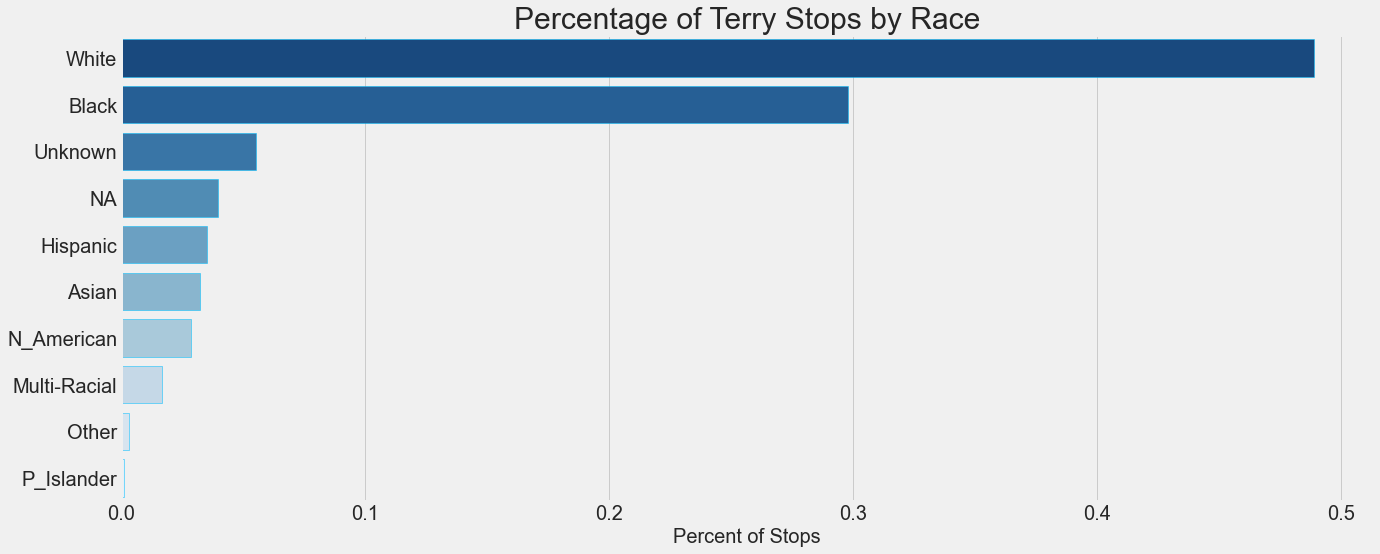

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='Percentage', y='Race', edgecolor='deepskyblue', palette='Blues_r', data=sdf)
ax.tick_params(labelsize=20)
plt.title('Percentage of Terry Stops by Race', fontsize=30)
plt.xlabel('Percent of Stops', fontsize=20)
plt.ylabel("")
plt.show()

## Proportion of Stops by Race

In [20]:
print(df['Subject Perceived Race'].value_counts())
df['Subject Perceived Race'].value_counts(normalize=True)

White           22951
Black           13985
Unknown          2607
NA               1870
Hispanic         1664
Asian            1524
N_American       1351
Multi-Racial      800
Other             152
P_Islander         56
Name: Subject Perceived Race, dtype: int64


White           0.488735
Black           0.297807
Unknown         0.055515
NA              0.039821
Hispanic        0.035434
Asian           0.032453
N_American      0.028769
Multi-Racial    0.017036
Other           0.003237
P_Islander      0.001193
Name: Subject Perceived Race, dtype: float64

## Visualizing the Proportion of Major Outcomes by Race

In [34]:
# creating an arrest rate data frame and visualization
arrest_rates = df[df['Target']==1]['Subject Perceived Race'].value_counts(normalize=True)

adf = pd.DataFrame(arrest_rates)
adf.reset_index(inplace=True)
adf.columns = ['Race', 'Proportion of Major Outcomes']

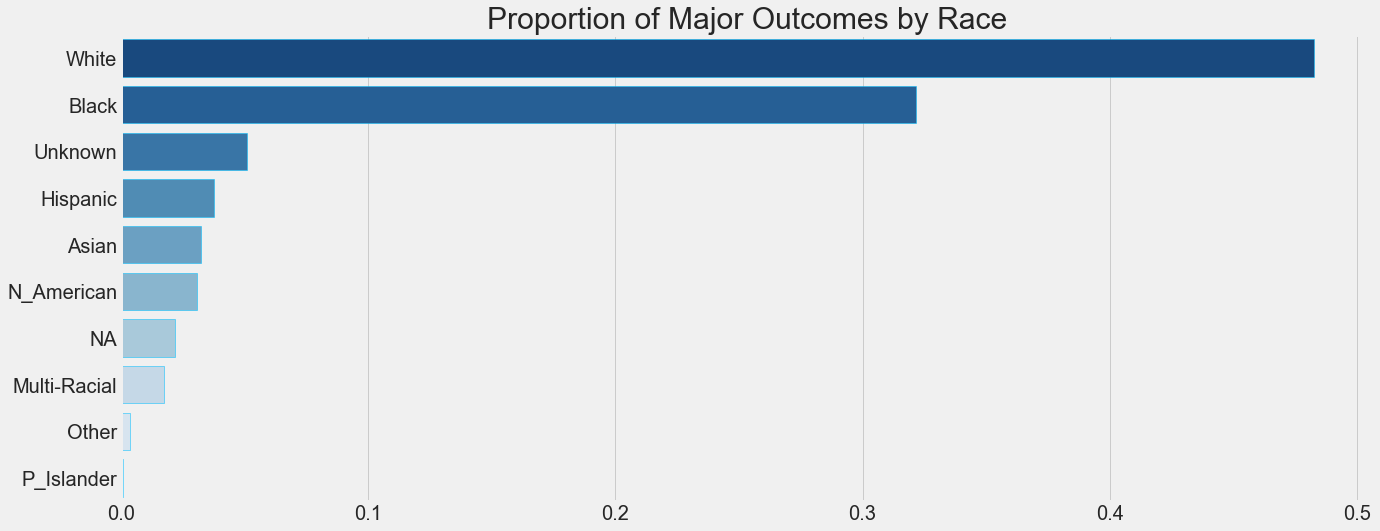

In [35]:
fig, ax = plt.subplots(figsize =(20, 8))
sns.barplot(x='Proportion of Major Outcomes', y='Race', data=adf, edgecolor='deepskyblue', palette='Blues_r')
plt.title('Proportion of Major Outcomes by Race', fontsize=30)
ax.tick_params(labelsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [43]:
df[df['Target']==1]['Subject Perceived Race'].value_counts(normalize=True)

White           0.482578
Black           0.321420
Unknown         0.050956
Hispanic        0.037571
Asian           0.032476
N_American      0.030717
NA              0.021854
Multi-Racial    0.017548
Other           0.003804
P_Islander      0.001077
Name: Subject Perceived Race, dtype: float64

## Proportion of Major Outcome Categories by Race
Checking the number and proportion of each the the categories (Arrest, Offense Report, Referred for Prosecution) that make up the target. 

### Arrests

In [42]:
df[df['Stop Resolution'] == 'Arrest']['Subject Perceived Race'].value_counts()

White           5491
Black           3894
Unknown          590
Asian            433
Hispanic         398
N_American       395
NA               193
Multi-Racial     162
Other             40
P_Islander        15
Name: Subject Perceived Race, dtype: int64

In [36]:
# checking proportion of arrests by race
df[df['Stop Resolution'] == 'Arrest']['Subject Perceived Race'].value_counts(normalize=True)

White           0.472914
Black           0.335372
Unknown         0.050814
Asian           0.037292
Hispanic        0.034278
N_American      0.034019
NA              0.016622
Multi-Racial    0.013952
Other           0.003445
P_Islander      0.001292
Name: Subject Perceived Race, dtype: float64

### Offense Report

In [41]:
df[df['Stop Resolution'] == 'Offense Report']['Subject Perceived Race'].value_counts()

White           7567
Black           4837
Unknown          808
Hispanic         626
Asian            462
N_American       434
NA               410
Multi-Racial     312
Other             63
P_Islander        15
Name: Subject Perceived Race, dtype: int64

In [38]:
df[df['Stop Resolution'] == 'Offense Report']['Subject Perceived Race'].value_counts(normalize=True)

White           0.487125
Black           0.311381
Unknown         0.052015
Hispanic        0.040299
Asian           0.029741
N_American      0.027939
NA              0.026394
Multi-Racial    0.020085
Other           0.004056
P_Islander      0.000966
Name: Subject Perceived Race, dtype: float64

### Referred for Prosecution

In [40]:
df[df['Stop Resolution'] == 'Referred for Prosecution']['Subject Perceived Race'].value_counts()

White           390
Black           226
N_American       27
Hispanic         23
Unknown          22
Multi-Racial     15
Asian            10
NA                6
Other             3
Name: Subject Perceived Race, dtype: int64

In [39]:
df[df['Stop Resolution'] == 'Referred for Prosecution']['Subject Perceived Race'].value_counts(normalize=True)

White           0.540166
Black           0.313019
N_American      0.037396
Hispanic        0.031856
Unknown         0.030471
Multi-Racial    0.020776
Asian           0.013850
NA              0.008310
Other           0.004155
Name: Subject Perceived Race, dtype: float64

## Analysis: Disproportionate Outcomes
We can see that when we compare the proportion of stops and major outcomes to the proportion of each race in the population there are wildly disproportionate outcomes for certain groups.

**According to July 1, 2019 US Census Data for Seattle and the calculations above:**

- **Asian**: 15.4% of population, 3.2% of stops, 3.2% of major outcomes.

- **White**: (Non-Hispanic) 63.8% of population, 48.9% of stops, 48.3% of major outcomes.

- **Black**: 7.3% of population, 29.9% of stops, 32.1% of major outcomes.

- **Native American**: 0.5% of population, 2.9% of stops, 3.1% of major outcomes.

- **Hispanic**: 6.7% of population, 3.5% of stops, 3.8% of major outcomes.

- **Multi-Racial**: 6.9% of population, 1.7% of stops, 1.8% of major outcomes.

- **Pacific Islander**: 0.3% of population, .12% of stops, .11% of major outcomes.

The Unknown racial category is absent from the census data but makes up 5.6% of stops and 5.1% of major outcomes.

## Visualizing the Rate of Weapons Found
Checking to see if the stop and arrest rates are in line with the rate that weapons are found on subjects according to race. We'll calculate a weapons found rate by race and plot the results.

In [45]:
# creating a weapons by race data frame
wdf = pd.DataFrame(df.groupby('Subject Perceived Race')['Weapon Flag'].value_counts())

# calculating the weapons found rate by race
races = df['Subject Perceived Race'].unique()
hit_rates = []
for race in races:
    hits = wdf.loc[race]['Weapon Flag'][1]   #number of people in the racial group found with a weapon
    #total number in the racial group stopped
    total = df[df['Subject Perceived Race']\
               == race].value_counts().sum() 
    rate = hits/total
    hit_rates.append([race, rate])

#  calculating the meat weapons found rate
mean_hit_rate = np.array([hit_rates[i][1] for i in range(len(hit_rates))]).mean()

# creating a hit rate data frame and visualization
hr_df = pd.DataFrame(hit_rates, columns = ['Race', 'Hit Rate']).sort_values(by='Hit Rate', ascending=False)

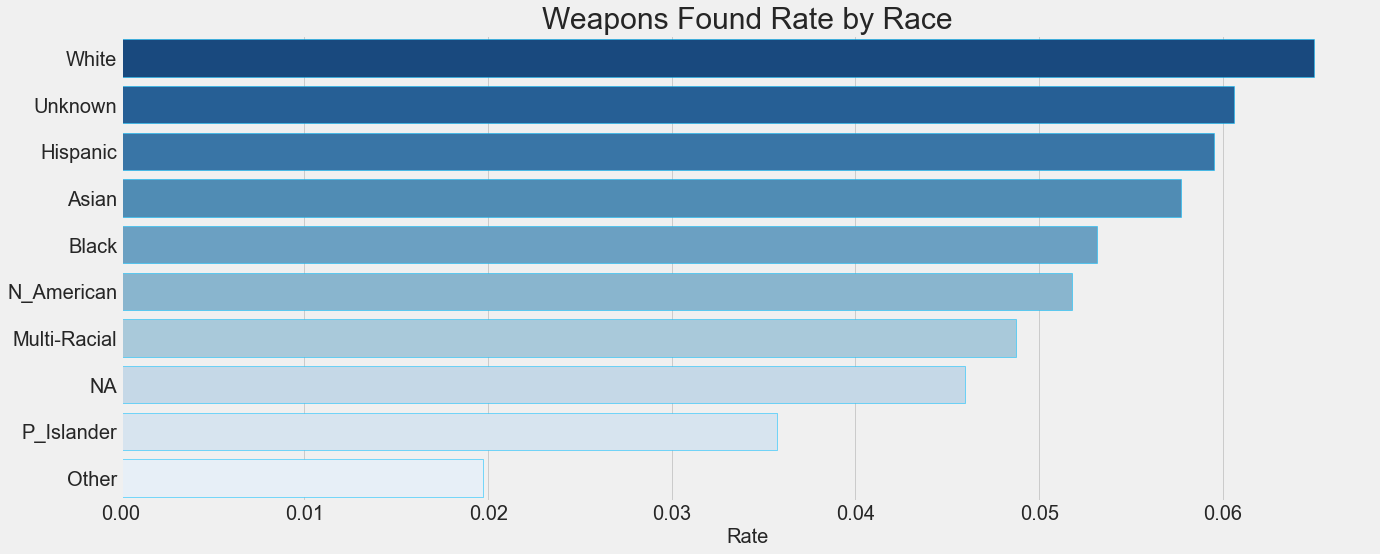

In [46]:
fig, ax = plt.subplots(figsize =(20, 8))
sns.barplot(y='Race', x='Hit Rate', data=hr_df, palette='Blues_r', edgecolor='deepskyblue')
plt.title('Weapons Found Rate by Race', fontsize=30)
ax.tick_params(labelsize=20)
plt.ylabel("")
plt.xlabel('Rate', fontsize=20)
plt.show()

In [47]:
print(f'Mean Weapon Found Rate: {mean_hit_rate}')
sorted(hit_rates, key=lambda x: x[1])[::-1]

Mean Weapon Found Rate: 0.04979407805711884


[['White', 0.06496448956472485],
 ['Unknown', 0.06060606060606061],
 ['Hispanic', 0.059495192307692304],
 ['Asian', 0.05774278215223097],
 ['Black', 0.0531283518055059],
 ['N_American', 0.05181347150259067],
 ['Multi-Racial', 0.04875],
 ['NA', 0.045989304812834225],
 ['P_Islander', 0.03571428571428571],
 ['Other', 0.019736842105263157]]

## Analysis
From the visualization and calculation above it appears that White & Hispanic subjects are stops less frequently than the weapons found rate suggests that they should be. Conversly, Black subjects are stopped elevated rates relative to the weapons found rate.

## Visualizing Stop Resolutions by Race, Age & Gender

## Stop Outcomes by Race

In [48]:
# making a list of the racial categories for visualization
races = df['Subject Perceived Race'].unique()

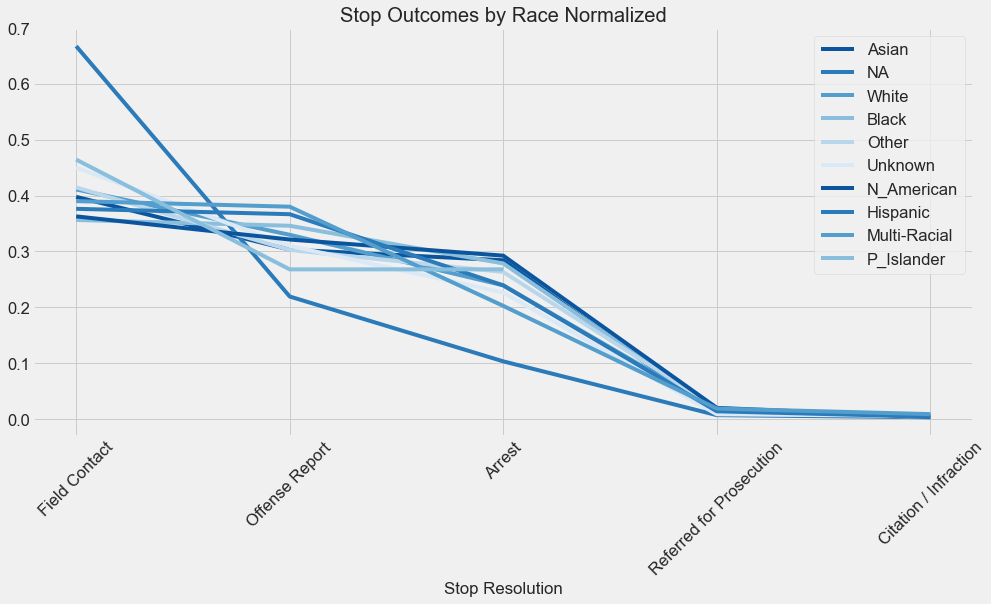

In [49]:
# checking outcomes by race
fig, axes=plt.subplots(figsize=(15,7))

for race in races:
    race_df = df.groupby('Subject Perceived Race')['Stop Resolution']\
                        .value_counts(normalize=True)[race]
    race_df.plot(label=f'{race}')
plt.title('Stop Outcomes by Race Normalized')    
plt.xticks(np.arange(5), ['Field Contact','Offense Report',\
                          'Arrest', 'Referred for Prosecution',\
                         'Citation / Infraction'], rotation=45)
plt.legend()
plt.show()

## Unpacking The Racial Categories for Visual Clarity
The plot above is a little cluttered so we'll break up the categories into two different plots

In [50]:
excluded = ['NA', 'Other', 'Unknown','Multi-Racial', 'P_Islander']
new_race_list = [x for x in races if x not in excluded]

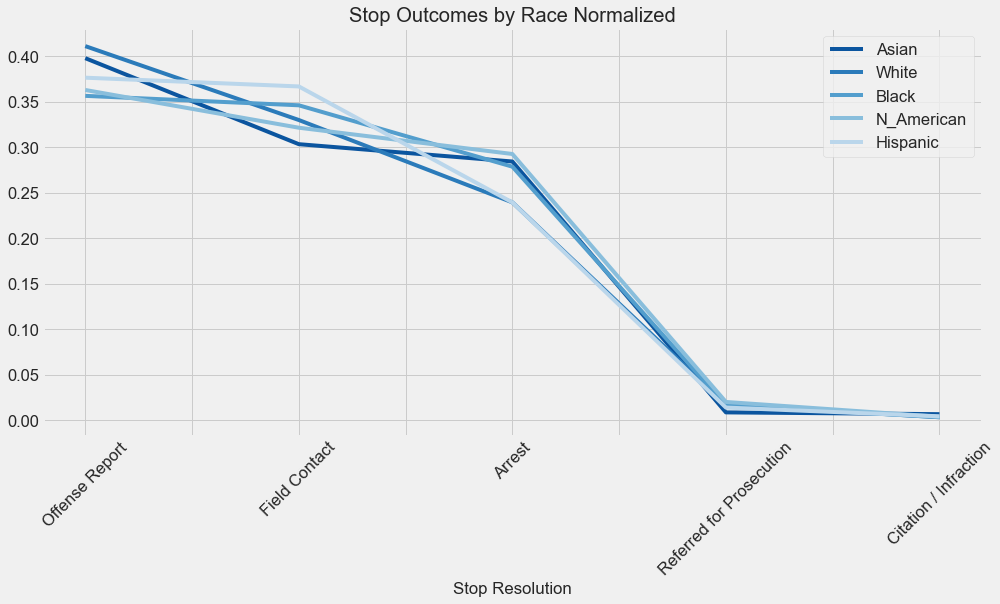

In [51]:
# checking outcomes by race
fig, axes=plt.subplots(figsize=(15,7))

for race in new_race_list:
    race_df = df.groupby('Subject Perceived Race')['Stop Resolution'].value_counts(normalize=True)[race]
    race_df.plot(label=f'{race}')
plt.title('Stop Outcomes by Race Normalized')    
plt.xticks(rotation=45)
plt.legend()
plt.show()

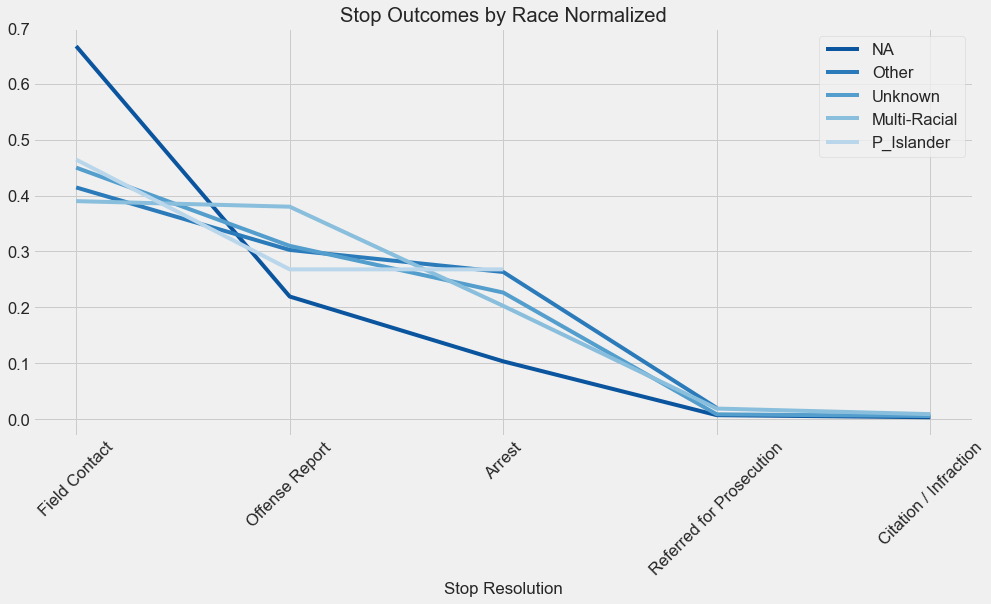

In [52]:
# checking outcomes by race
fig, axes=plt.subplots(figsize=(15,7))

for race in excluded:
    race_df = df.groupby('Subject Perceived Race')['Stop Resolution'].value_counts(normalize=True)[race]
    race_df.plot(label=f'{race}')
plt.title('Stop Outcomes by Race Normalized')    
plt.xticks(np.arange(5), ['Field Contact','Offense Report',\
                          'Arrest', 'Referred for Prosecution',\
                         'Citation / Infraction'], rotation=45)
plt.legend()
plt.show()

## Stop Outcomes by Race

In [64]:
# checking outcomes by race
df.groupby('Subject Perceived Race')['Target']\
.value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)

Target,0,1
Subject Perceived Race,,
Other,0.302632,0.697368
Black,0.359528,0.640472
N_American,0.366395,0.633605
Hispanic,0.370793,0.629207
Multi-Racial,0.388750,0.611250
Asian,0.406168,0.593832
White,0.414056,0.585944
Unknown,0.455313,0.544687
P_Islander,0.464286,0.535714


## Analysis
From the visiualizations we can see that Asian, Black, Native American and Pacific Islander subjects are arrested at a elevated rates relative to Hispanic, Multi-Racial,  and White subjects, confirming our earlier anaylsis. Further, Black, Hispanic, and Native American subjects have higher rates of major outcomes than other groups. Lastly, stops where no racial information was recorded have a higher minor outcome rate than all other racial categories.

## Plotting Stop Outcomes by Age Cohort

In [54]:
#  getting age list
ages = df['Subject Age Group'].unique()

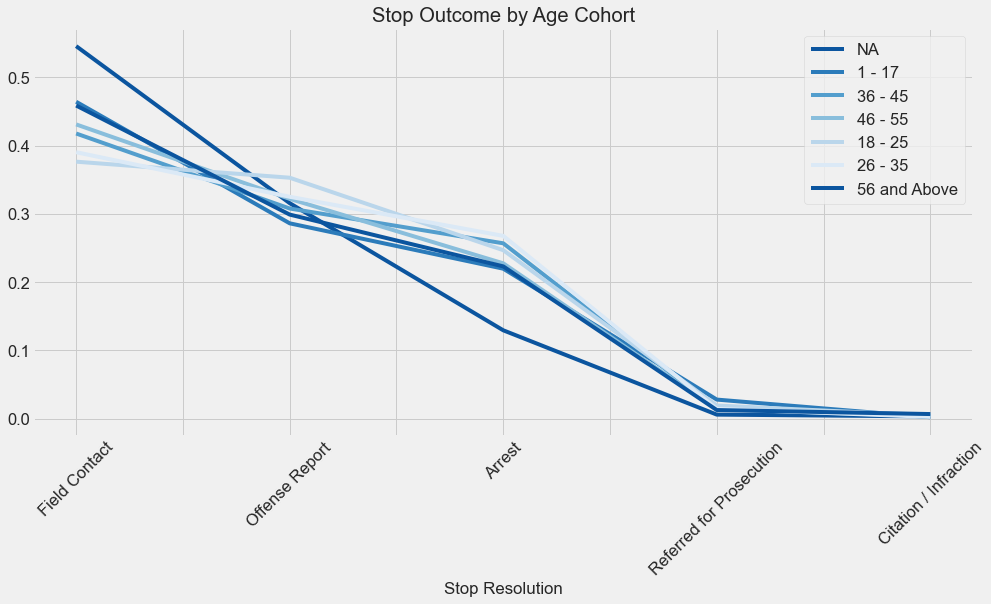

In [55]:
# checking outcomes by age category
fig, axes=plt.subplots(figsize=(15,7))

for age in ages:
    age_df = df.groupby('Subject Age Group')['Stop Resolution'].value_counts(normalize=True)[age]
    age_df.plot(label=f'{age}')
plt.title('Stop Outcome by Age Cohort')    
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [56]:
df.groupby('Subject Age Group')['Target'].value_counts(normalize=True).unstack()\
.sort_values(by=1, ascending=False)

Target,0,1
Subject Age Group,,
1 - 17,0.288179,0.711821
18 - 25,0.381018,0.618982
26 - 35,0.392898,0.607102
36 - 45,0.421132,0.578868
46 - 55,0.436975,0.563025
56 and Above,0.465409,0.534591
NA,0.549020,0.450980


## Analysis: Youth Subjects Face Sharply Higher Major Oucome Rates
Adults 45+ have slightly lower major outcome rates than other cohorts with the exception of NA which has the lowest major outcome rate. 

## Visualizing Stop Outcomes By Gender

In [57]:
# getting gender list
genders = df['Subject Perceived Gender'].unique()

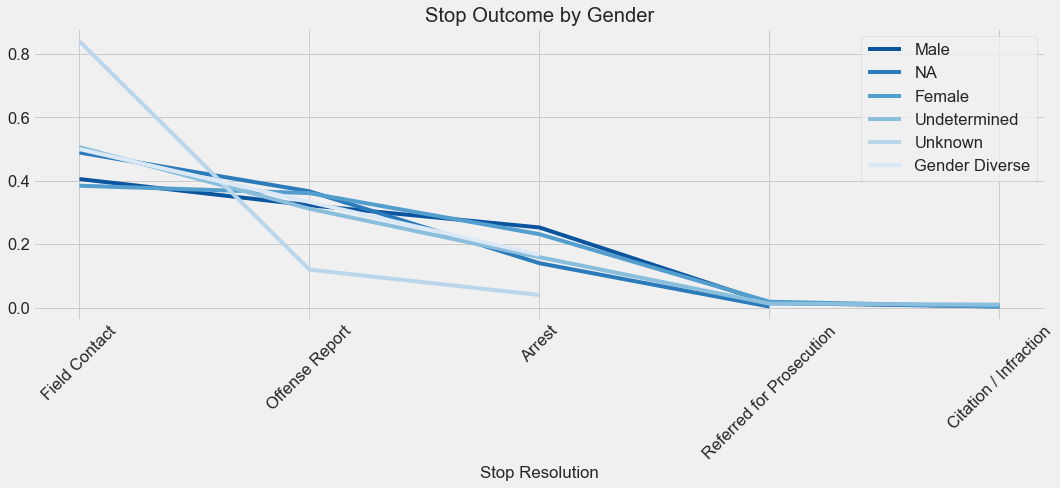

In [58]:
# checking outcome by gender
fig, axes=plt.subplots(figsize=(15,7))

for g in genders:
    age_df = df.groupby('Subject Perceived Gender')\
    ['Stop Resolution'].value_counts(normalize=True)[g]
    age_df.plot(label=f'{g}')
plt.title('Stop Outcome by Gender')    
plt.xticks(np.arange(5), ['Field Contact','Offense Report',\
                          'Arrest', 'Referred for Prosecution',\
                         'Citation / Infraction'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
df.groupby('Subject Perceived Gender')\
['Target'].value_counts(normalize=True).unstack()\
.sort_values(by=1, ascending=False)

Target,0,1
Subject Perceived Gender,,
Female,0.388159,0.611841
Male,0.409444,0.590556
NA,0.489209,0.510791
Gender Diverse,0.500000,0.500000
Undetermined,0.519108,0.480892
Unknown,0.840000,0.160000


## Analysis: Male and Female Subjects Have Similar Major Outcome Rates
Both are arrested at a higher rate than gender diverse or ambiguous subjects.

## Visualizing the Target Feature

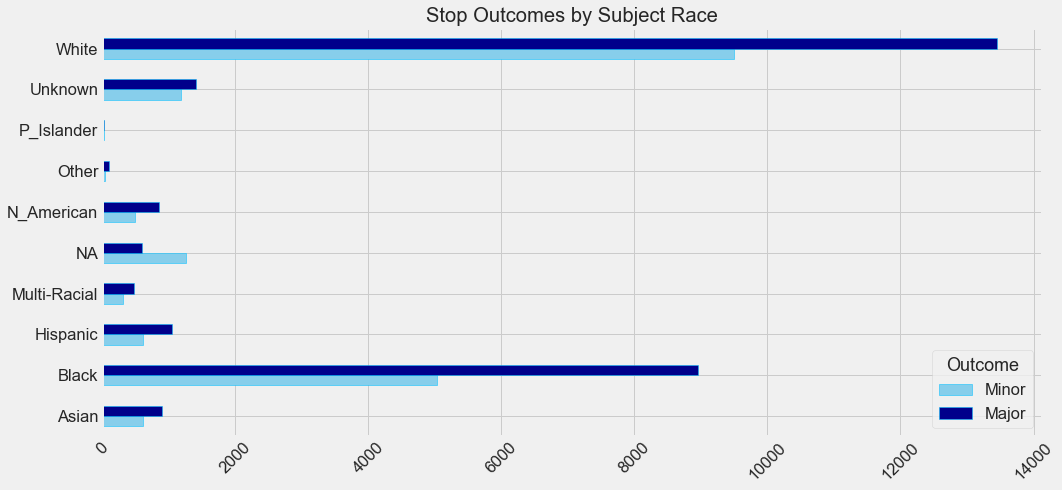

In [65]:
# getting normalized target value counts by race for visualization
target_race = df.groupby('Subject Perceived Race')['Target'].value_counts().unstack()

# visualizing target values by race
target_race.plot(kind='barh', figsize=(15,7), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.title('Stop Outcomes by Subject Race')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.ylabel("")
plt.show()

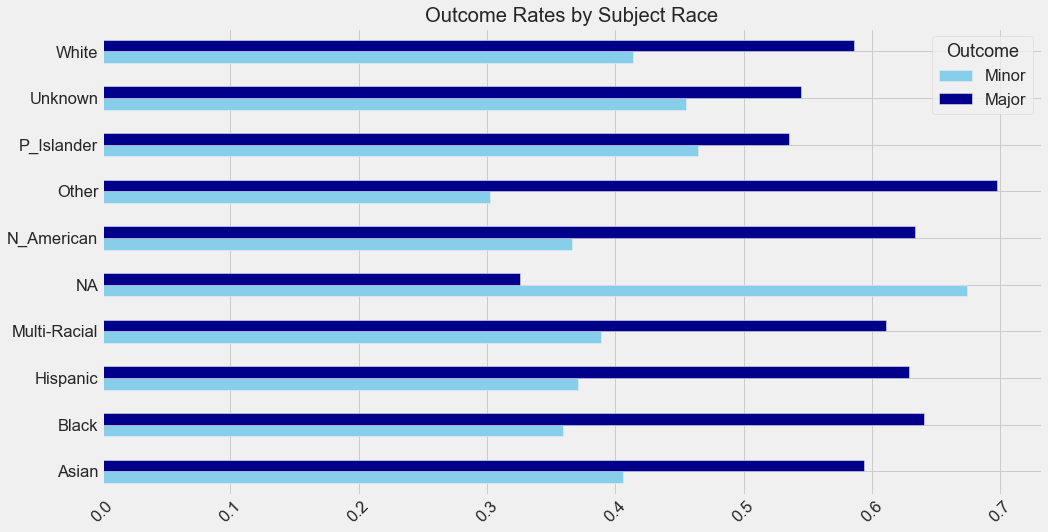

In [66]:
# getting target value counts by race for visualization
target_race = df.groupby('Subject Perceived Race')\
                        ['Target'].value_counts(normalize=True).unstack()

# visualizing target values by race
target_race.plot(kind='barh', figsize=(15,8), color=['skyblue', 'darkblue'])
plt.title('Outcome Rates by Subject Race')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [67]:
target_race.sort_values(by=1, ascending=False)

Target,0,1
Subject Perceived Race,,
Other,0.302632,0.697368
Black,0.359528,0.640472
N_American,0.366395,0.633605
Hispanic,0.370793,0.629207
Multi-Racial,0.388750,0.611250
Asian,0.406168,0.593832
White,0.414056,0.585944
Unknown,0.455313,0.544687
P_Islander,0.464286,0.535714


## Analysis
Again we see that Other, Black, Hispanic, Native American subjects have elevated major outcome rates relative to White subjects, confirming our earlier anaylsis. Again, we see that stops where no racial information was recorded have the lowest major outcome rate. 

## Visualizing the Target by Subject Gender

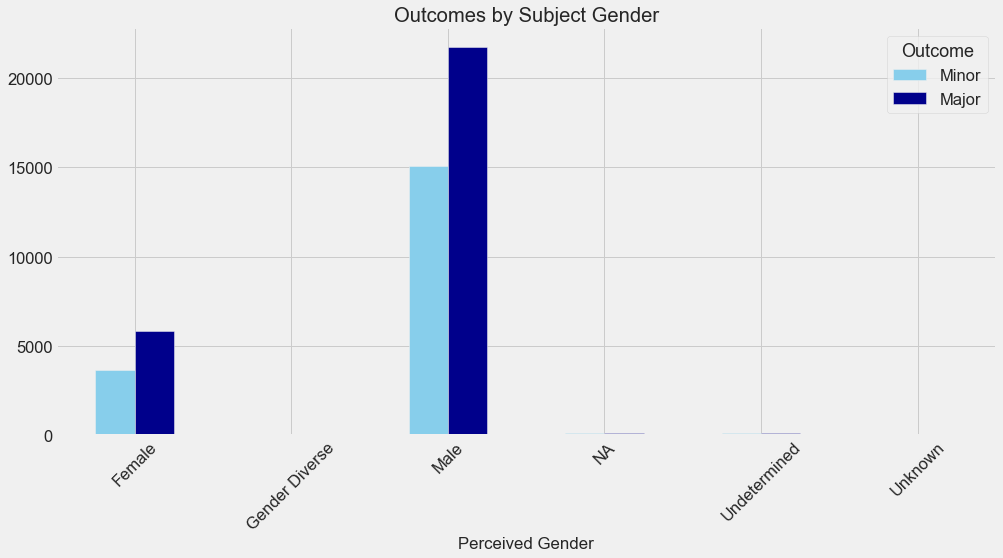

In [70]:
#  getting target value counts by gender
target_gender = df.groupby('Subject Perceived Gender')['Target'].value_counts().unstack()

# visualizing target values by gender
target_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Subject Gender')                                                 
plt.xlabel('Perceived Gender')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

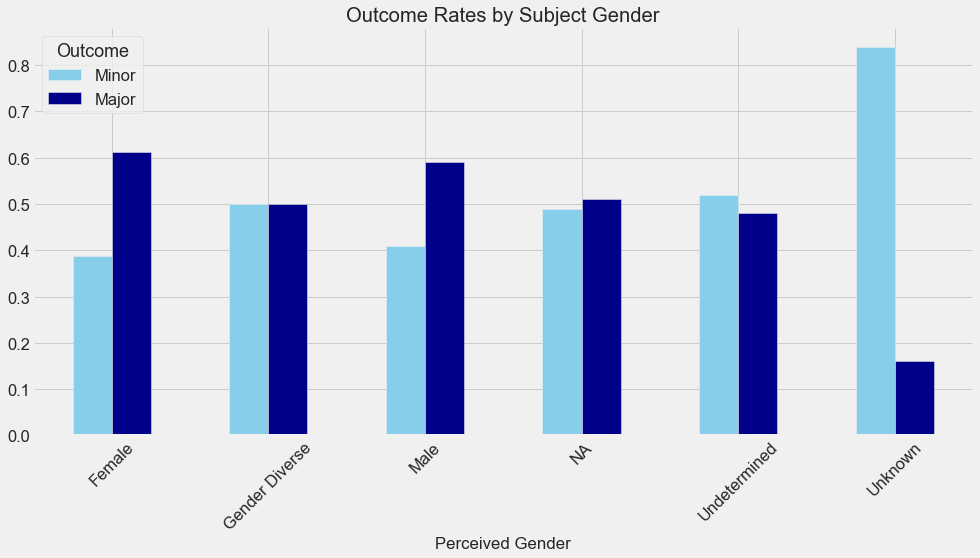

In [71]:
#  getting target value counts by gender
target_gender = df.groupby('Subject Perceived Gender')\
['Target'].value_counts(normalize=True).unstack()

# visualizing target values by gender
target_gender.plot(kind='bar', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcome Rates by Subject Gender')                                                 
plt.xlabel('Perceived Gender')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [72]:
target_gender.sort_values(by=1, ascending=False)

Target,0,1
Subject Perceived Gender,,
Female,0.388159,0.611841
Male,0.409444,0.590556
NA,0.489209,0.510791
Gender Diverse,0.500000,0.500000
Undetermined,0.519108,0.480892
Unknown,0.840000,0.160000


## Analysis: Male and Female Subjects Have About the Same Rate of Major Outcomes
Both have major outcomes at a higher rate than gender diverse or gender ambiguous subjects.

## Visualizing the Target by Officer Race

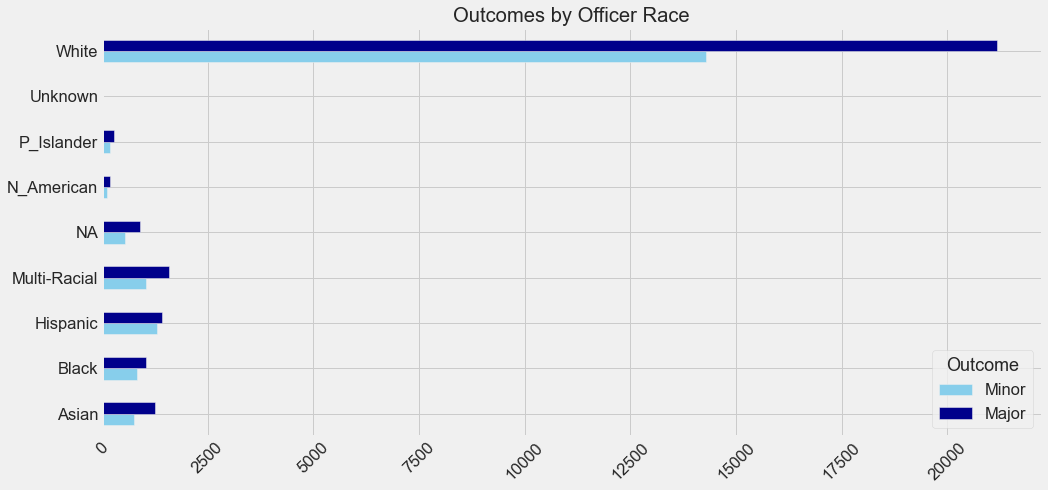

In [73]:
# getting target value counts by officer race
officer_races = df.groupby('Officer Race')['Target'].value_counts().unstack()

officer_races.plot(kind='barh', figsize=(15,7), color=['skyblue', 'darkblue'])
plt.title('Outcomes by Officer Race')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

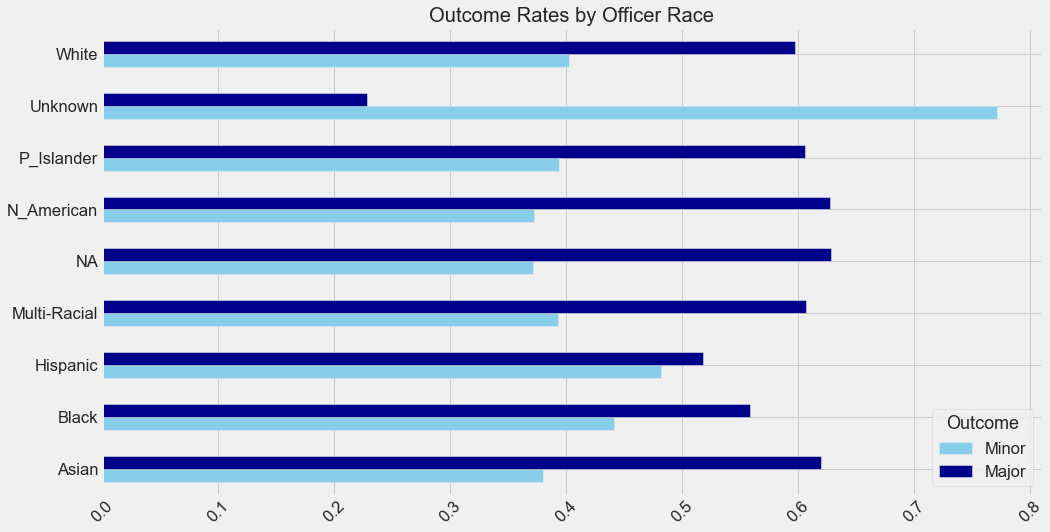

In [74]:
officer_races = df.groupby('Officer Race')['Target'].value_counts(normalize=True).unstack()

officer_races.plot(kind='barh', figsize=(15,8), color=['skyblue', 'darkblue'])

plt.title('Outcome Rates by Officer Race')
plt.xlabel('Officer Race')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [75]:
df.groupby('Officer Race')['Target'].value_counts(normalize=True)\
.unstack().sort_values(by=1, ascending=False)

Target,0,1
Officer Race,,
NA,0.371804,0.628196
N_American,0.372240,0.627760
Asian,0.379891,0.620109
Multi-Racial,0.393156,0.606844
P_Islander,0.394273,0.605727
White,0.402961,0.597039
Black,0.441649,0.558351
Hispanic,0.482202,0.517798
Unknown,0.771429,0.228571


## Analysis: Black & Hispanic Officers Have Lower Major Outcome Rates Than Other Groups

## Visualizing the Target by Officer Gender

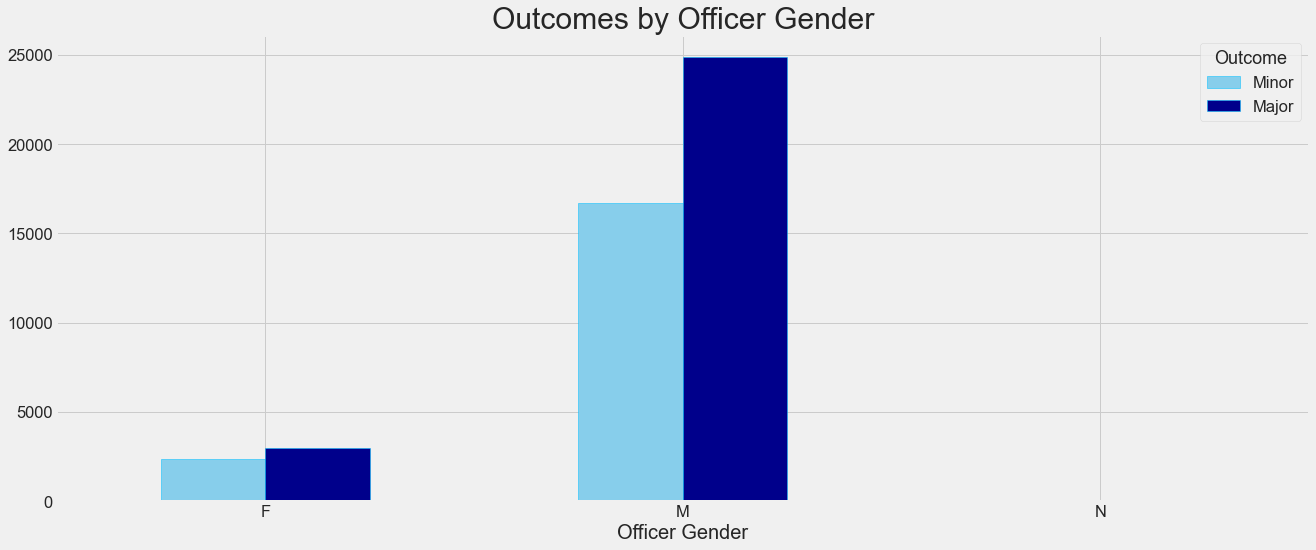

In [102]:
officer_gender = df.groupby('Officer Gender')['Target'].value_counts().unstack()

officer_gender.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.title('Outcomes by Officer Gender', fontsize=30)
plt.xlabel('Officer Gender', fontsize=20)
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

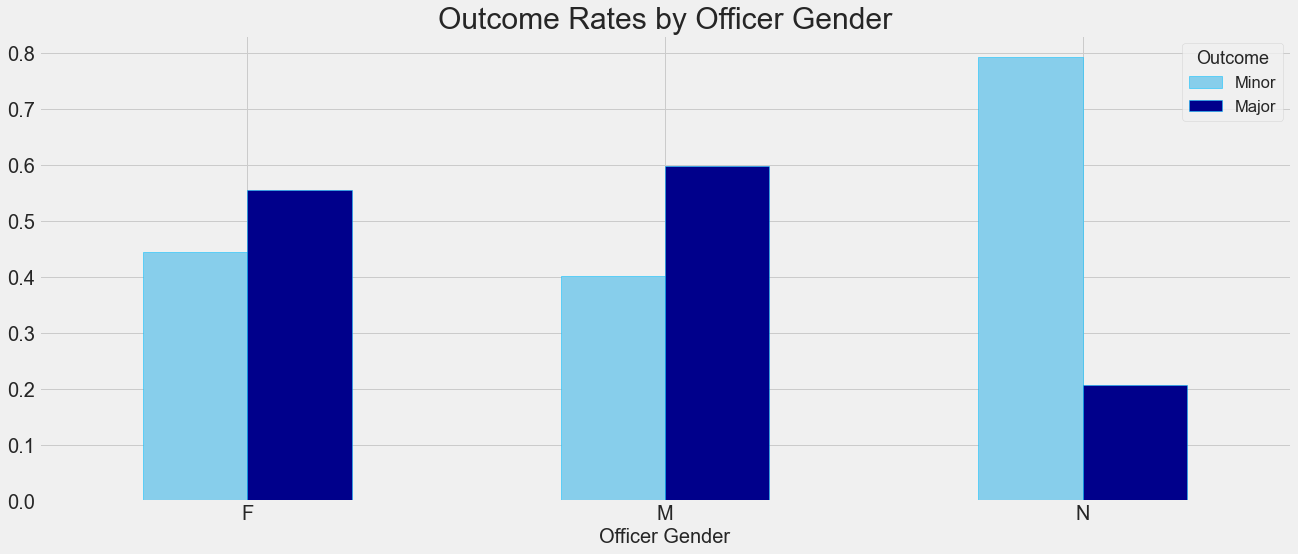

In [103]:
officer_gender = df.groupby('Officer Gender')['Target'].value_counts(normalize=True).unstack()

ax = officer_gender.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.title('Outcome Rates by Officer Gender', fontsize=30)
ax.tick_params(labelsize=20)
plt.xticks(rotation=0)
plt.xlabel('Officer Gender', fontsize=20)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [ ]:
df.groupby('Officer Gender')['Target'].value_counts(normalize=True).unstack()\
.sort_values(by=1, ascending=False)                             

## Analysis: Male Have a Higher Major Outcome Rate

## Visualizing the Target by Precinct

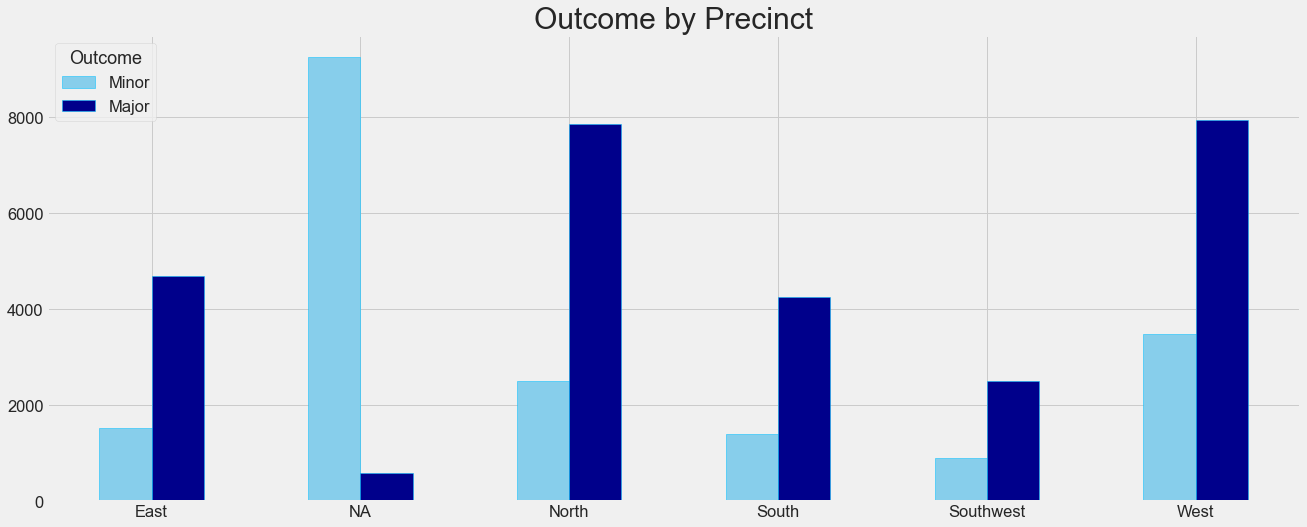

In [104]:
pdf = df.groupby('Precinct')['Target'].value_counts().unstack()
pdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome by Precinct', fontsize=30)
plt.xlabel('')
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

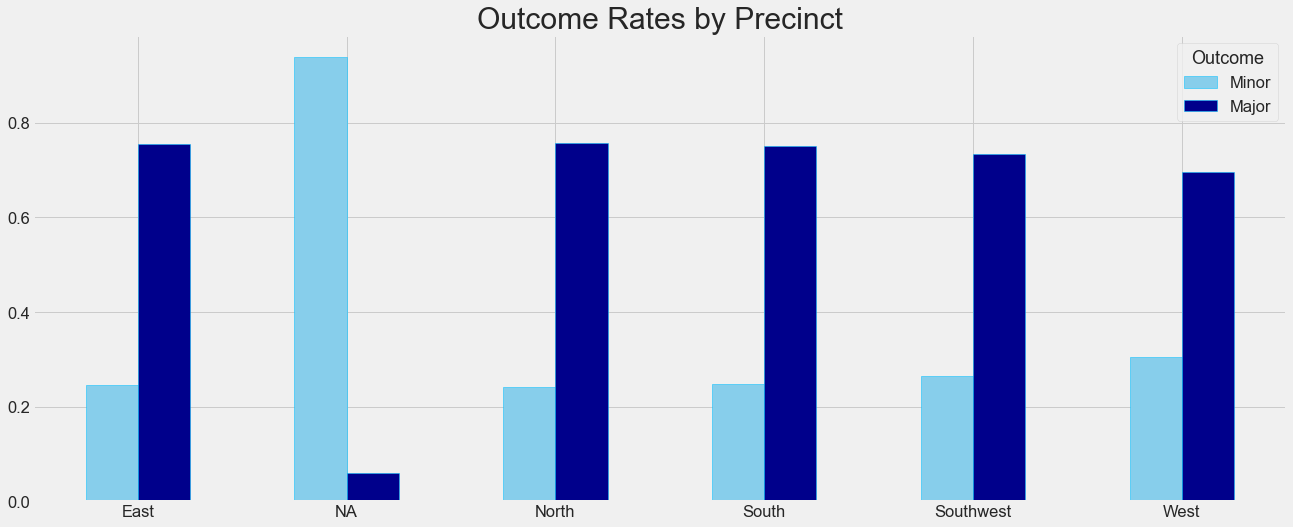

In [105]:
pdf = df.groupby('Precinct')['Target'].value_counts(normalize=True).unstack()
pdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome Rates by Precinct', fontsize=30)
plt.xlabel('')
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [ ]:
pdf.sort_values(by=1,ascending=False)

## Analysis: Stops With No Precinct Information Have Much Lower Major Outcome Rates
The West precinct also has a lower major outcome rate.

## Visualizing the Target by Beat

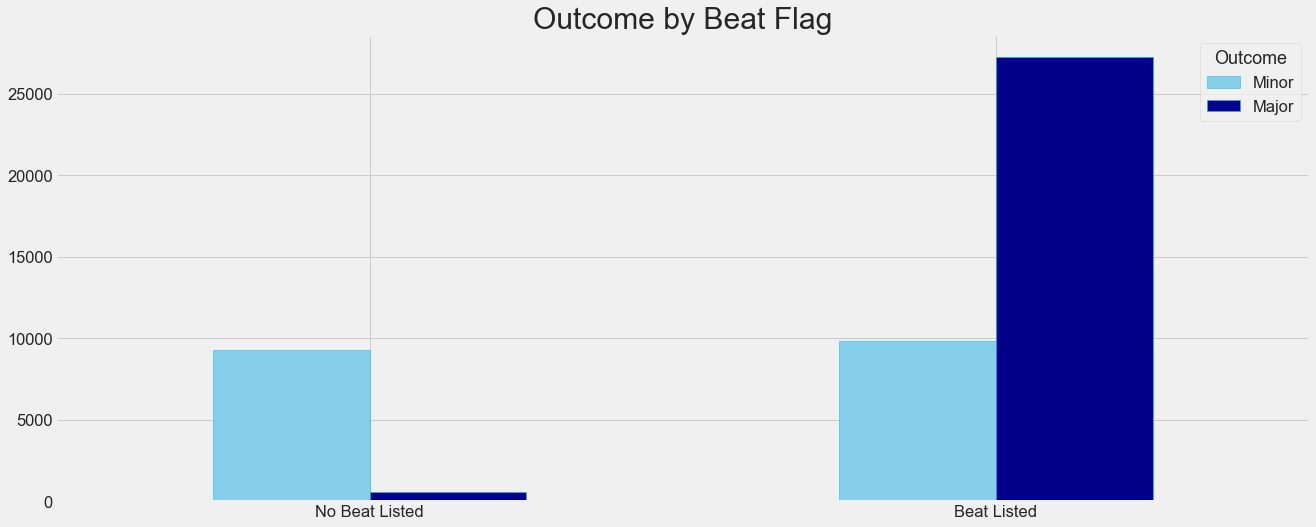

In [106]:
bdf = df.groupby('Beat Flag')['Target'].value_counts().unstack()
bdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome by Beat Flag', fontsize=30)
plt.xlabel('')
plt.xticks(np.arange(2), ['No Beat Listed','Beat Listed'], rotation=0)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

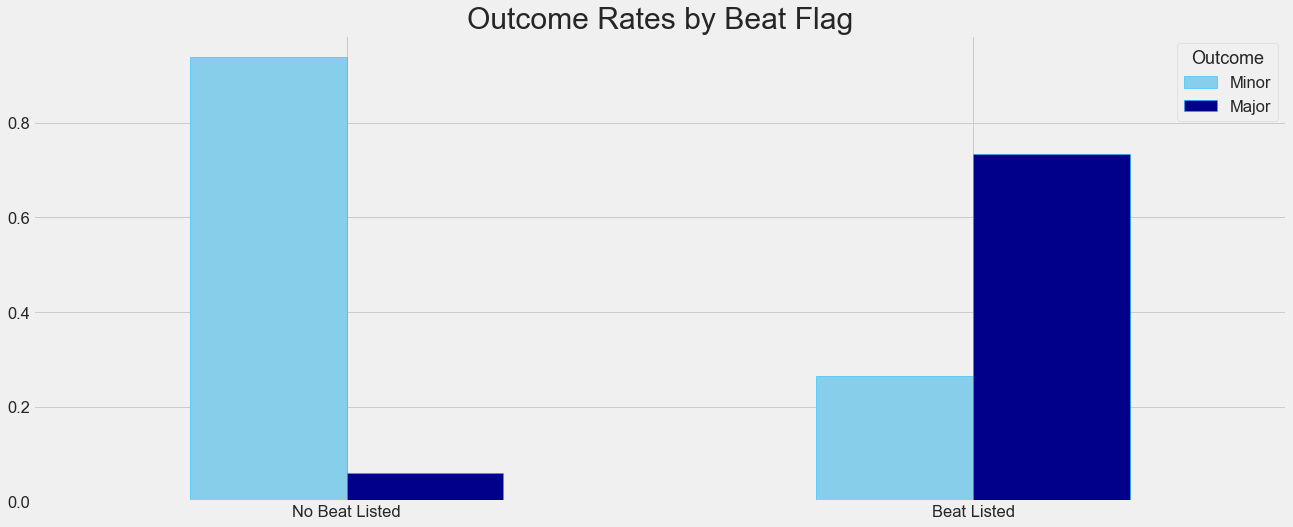

In [107]:
bdf = df.groupby('Beat Flag')['Target'].value_counts(normalize=True).unstack()
bdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome Rates by Beat Flag', fontsize=30)
plt.xlabel('')
plt.xticks(np.arange(2), ['No Beat Listed','Beat Listed'], rotation=0)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [ ]:
bdf.sort_values(by=1, ascending=False)

## Analysis: Stops With No Beat Information Are Much Less Likely to End in A Major Outcome

## Proportion of Stops by Race

In [108]:
beats = df.groupby(['Beat Flag'])['Subject Perceived Race'].value_counts(normalize=True).unstack()

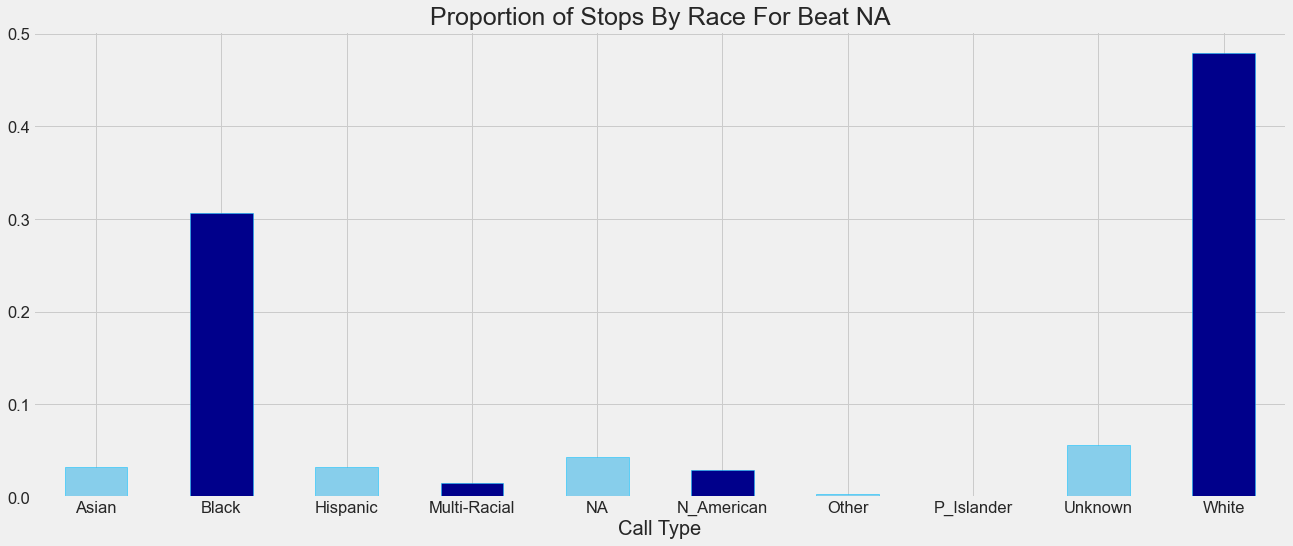

In [109]:
beats.loc[1].plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.xticks(rotation=0)
plt.title('Proportion of Stops By Race For Beat NA' , fontsize=25)
plt.xlabel('Call Type', fontsize=20)
plt.show()

In [110]:
print(beats.loc[1].sort_values(ascending=False))
df['Subject Perceived Race'].value_counts(normalize=True)

Subject Perceived Race
White           0.479394
Black           0.306757
Unknown         0.056144
NA              0.043126
Hispanic        0.032829
Asian           0.032721
N_American      0.028840
Multi-Racial    0.015633
Other           0.003127
P_Islander      0.001429
Name: 1, dtype: float64


White           0.488735
Black           0.297807
Unknown         0.055515
NA              0.039821
Hispanic        0.035434
Asian           0.032453
N_American      0.028769
Multi-Racial    0.017036
Other           0.003237
P_Islander      0.001193
Name: Subject Perceived Race, dtype: float64

In [112]:
df['Beat Flag'].value_counts(normalize=True)[:25]

1    0.790055
0    0.209945
Name: Beat Flag, dtype: float64

## Analysis: Racial Makeup of No Beat Stops Is In Line The Makeup of Stops In General 

## Visualizing the Target by Call Type

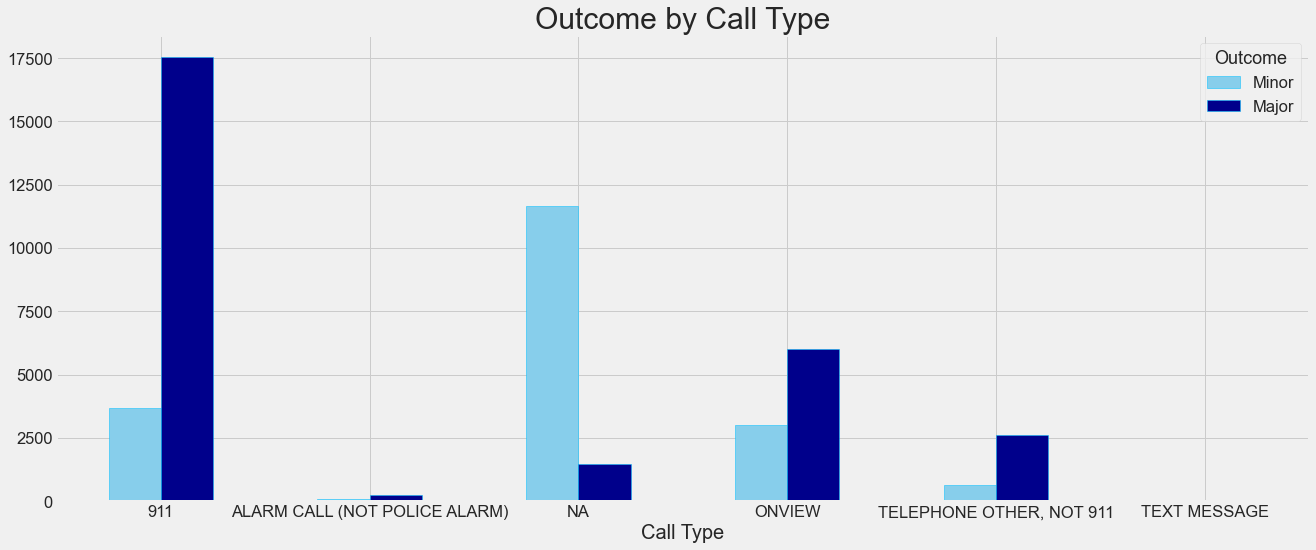

In [114]:
cdf = df.groupby('Call Type')['Target'].value_counts().unstack()
cdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome by Call Type', fontsize=30)
plt.xlabel('Call Type', fontsize=20)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

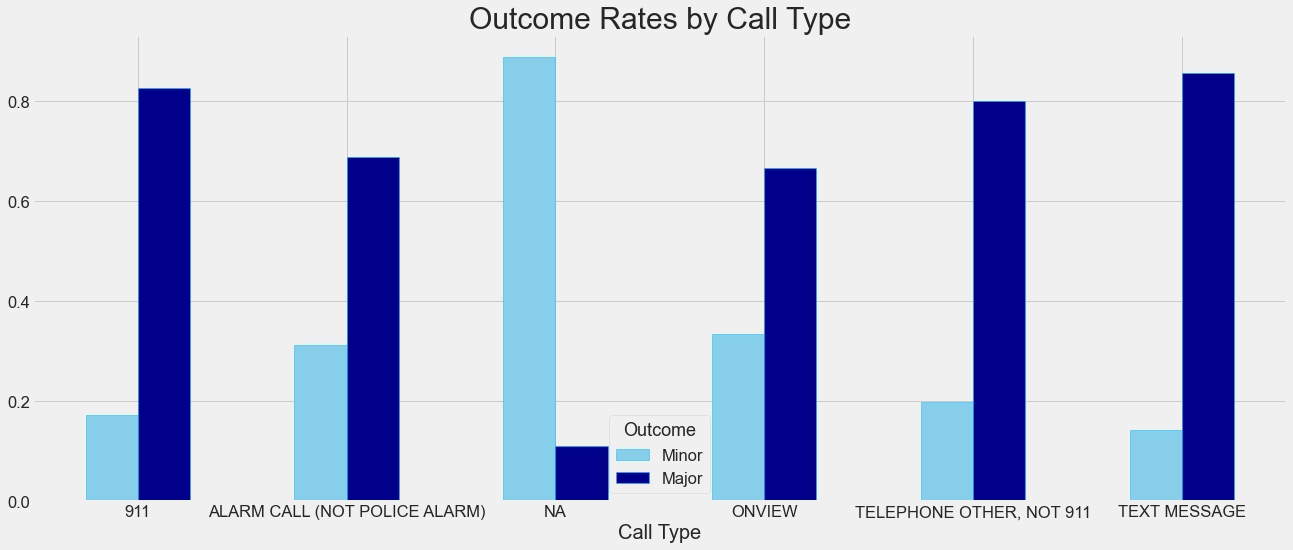

In [115]:
cdf = df.groupby('Call Type')['Target'].value_counts(normalize=True).unstack()
cdf.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')

plt.xticks(rotation=0)
plt.title('Outcome Rates by Call Type', fontsize=30)
plt.xlabel('Call Type', fontsize=20)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

In [116]:
df['Call Type'].value_counts(normalize=True)

911                              0.451874
NA                               0.279067
ONVIEW                           0.192014
TELEPHONE OTHER, NOT 911         0.069655
ALARM CALL (NOT POLICE ALARM)    0.007240
TEXT MESSAGE                     0.000149
Name: Call Type, dtype: float64

In [117]:
cdf.sort_values(by=1, ascending=False)

Target,0,1
Call Type,,
TEXT MESSAGE,0.142857,0.857143
911,0.173280,0.826720
"TELEPHONE OTHER, NOT 911",0.198716,0.801284
ALARM CALL (NOT POLICE ALARM),0.311765,0.688235
ONVIEW,0.334479,0.665521
NA,0.888440,0.111560


## Analysis: 45% of Stops Originate from 911 Calls and 19% Are Initiated by Officer Observations
- 82.7% of 911 originated stops end in a major outcome.
- 66.6% of officer initiated stops end in a major outcome.
- 11.2% of stops with no origination information end in a major outcome.

## Initial Call Type

In [4]:
df['Initial Call Type'].value_counts(normalize=True)

NA                                                0.279067
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.067206
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.063394
DISTURBANCE, MISCELLANEOUS/OTHER                  0.051682
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.042611
                                                    ...   
MISSING - ADULT                                   0.000021
KNOWN KIDNAPPNG                                   0.000021
MISSING - (ALZHEIMER, ENDANGERED, ELDERLY)        0.000021
ALARM - ATM MACHINE, FREE STANDING                0.000021
HARBOR - WATER EMERGENCIES                        0.000021
Name: Initial Call Type, Length: 167, dtype: float64

## Binarizing Initial Call

In [118]:
df['Initial Call Type'] = df['Initial Call Type'].replace('NA', 0)
df['Initial Call Type'] = df['Initial Call Type'].map(lambda x: 1 if x!=0 else 0)

In [119]:
df['Initial Call Type'].value_counts()

1    33855
0    13105
Name: Initial Call Type, dtype: int64

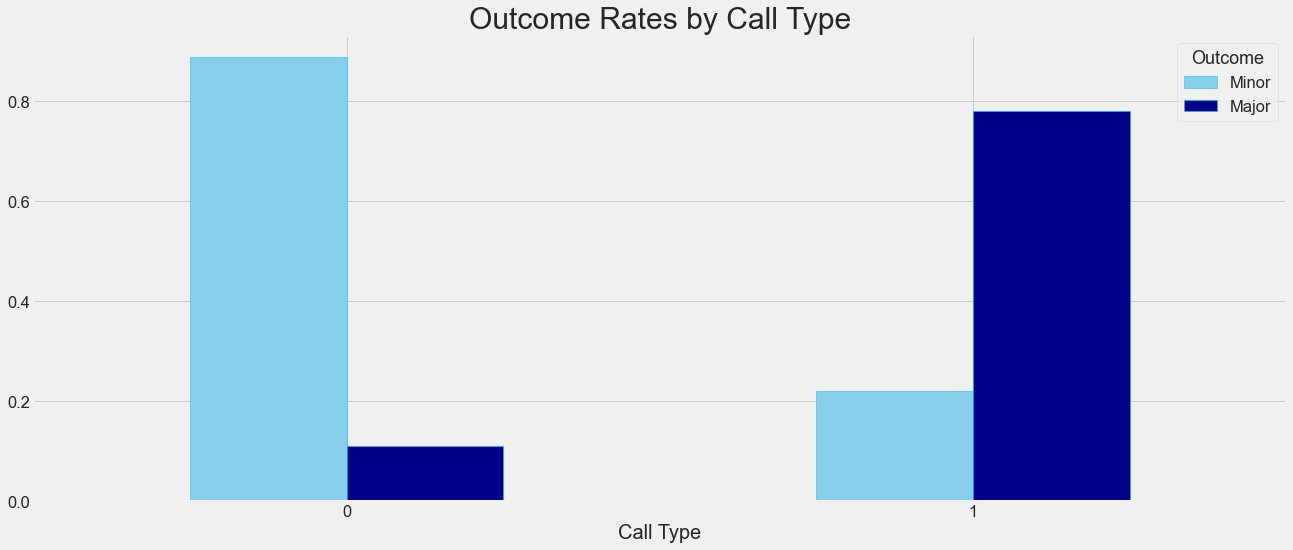

In [120]:
call_bin = df.groupby('Initial Call Type')['Target'].value_counts(normalize=True).unstack()
call_bin.plot(kind='bar', figsize=(20,8), color=['skyblue', 'darkblue'], edgecolor='deepskyblue')
plt.xticks(rotation=0)
plt.title('Outcome Rates by Call Type', fontsize=30)
plt.xlabel('Call Type', fontsize=20)
plt.legend(title='Outcome', labels=['Minor', 'Major'])
plt.show()

## Analysis: Calls With No Call Type Data Much Less Likely to End in A Major Outcome

## Visualizing Officers With Most Arrests

In [ ]:
# checking out arrests by officer id
arrests = df[df['Target']==1]
oid = arrests.groupby('Officer ID')['Target'].value_counts()
officer_df = pd.DataFrame(oid)
officer_df.columns = ['Arrests']
officer_df = officer_df.reset_index()
top20 = officer_df.drop('Target', axis=1).sort_values(by='Arrests', ascending=False)[:20]

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='Arrests', y='Officer ID', edgecolor='deepskyblue', palette='Blues_r', data=top20)
plt.title('Top 20 Officers by Arrest')
plt.show()

In [ ]:
# top 20 officers by arrest
top20